In [45]:
#loading necessary libraries
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")


In [35]:
#loading the dataset
df=pd.read_csv('C:/Users/RAJENDRAN/Downloads/CoronaTweetsSentimentAnalysis.csv')

In [36]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...,Positive
4,5,44967,"Washington, DC",04-03-2020,"While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0",Positive


In [9]:
#dataset head
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [10]:
df.shape

(1988, 6)

In [18]:
df.TweetAt.value_counts()

13-03-2020    654
12-03-2020    372
14-03-2020    336
15-03-2020    249
16-03-2020    232
11-03-2020     90
10-03-2020     34
09-03-2020      6
07-03-2020      6
08-03-2020      2
02-03-2020      2
04-03-2020      2
05-03-2020      2
03-03-2020      1
Name: TweetAt, dtype: int64

In [19]:
df['Location'].value_counts()

United States                     42
London, England                   25
Washington, DC                    22
New York, NY                      20
Los Angeles, CA                   16
                                  ..
Islamic Republic of Iran           1
Live, Love b a voice 4 change      1
Lewisville, TX and Mesquite, T     1
Gaia                               1
Charlotte, NC                      1
Name: Location, Length: 1019, dtype: int64

In [20]:
df['Sentiment'].value_counts()

Negative    1041
Positive     947
Name: Sentiment, dtype: int64

In [21]:
df[df['Sentiment']=='Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative
6,7,44973,Malta,05-03-2020,"#CoronaVirus #COVID_19 People are starting to become frightened and to do #PanicShopping. Many shelves, meanwhile, turn empty as #goods are sold. #FaceMasks &amp; disinfection liquid are sold out,...",Negative
8,9,44979,"Bondi Beach, Sydney",07-03-2020,When your usual grocery shopping @woolworths turns into a toilet paper fight in the supermarket aisle. Yikes. #toiletpaperpanic for the #coronavirus has taken a whole new level. https://t.co/aKJ28...,Negative
9,10,44980,NaN,07-03-2020,Coronavirus panic spreads: Costco is pulling free samples over COVID-19 - USA TODAY\r\r\n\r\r\nCoronavirus panic spreads: Costco is pulling free samples over COVID-19 USA TODAY\r\r\n\r\r\n'It's p...,Negative
10,11,44981,NaN,07-03-2020,"While you are stocking up, waiting for quarantine, if you can don't forget to donate food, water, and toiletries to your local food banks to help others without the means to stock up. Get ahead o...",Negative
...,...,...,...,...,...,...
1977,1978,48723,"West Virginia, USA",16-03-2020,"PSA: Stop panicking about COVID-19, you don't need to shelter yourselves from the outside world and stock up on toilet paper and food enough to stuff Old Faithful 10x over. If you want to go out a...",Negative
1978,1979,48724,"Houston, TX",16-03-2020,When I'm stopped by George at the grocery store - Should I cough on you George.. #coronapocolypse #coronavirus #StayTheFHome #COVID?19 #COVID2019 #COVID19 #CoronaVirusUpdates #CoronavirusOutbreak ...,Negative
1982,1983,48736,Texas,16-03-2020,Amazon delivery infrastructure strained as COVID-19 outbreak sparks surge in online shopping  GeekWire\r\r\nhttps://t.co/UCcEiOY6qK,Negative
1985,1986,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call on the General Assembly to enact a legal stay against debt collection activities now that thousands of Marylanders are without a paycheck? \r\r\n\r\r...",Negative


In [22]:
df[df['Sentiment']=='Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...,Positive
4,5,44967,"Washington, DC",04-03-2020,"While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0",Positive
5,6,44971,NaN,05-03-2020,"That's about a week from now. A bit optimistic. Probably it will take another month. Supply chain may be recovering, demand chain will be non-existent in US and Europe for the next month or two....",Positive
...,...,...,...,...,...,...
1980,1981,48732,NaN,16-03-2020,"Stuck inside? How about getting some reading in to fill the time, and your mind? For the #coronavirus #COVID?19 time, I've lowered all ebook prices to $0.99. Comedy, drama, action, philosophy, ...",Positive
1981,1982,48733,"Kansas, USA",16-03-2020,@GovLauraKelly PLEASE CLOSE ALL RETAIL that is not a pharmacy or a grocery store. People in Wyandotte County are not heading the warnings to STAY HOME. People like me (asthmatic) can't risk going ...,Positive
1983,1984,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is busy. Staff say it's been that way since the COVID-19 case in Wellington hit the news. Still food on the shelves - a few gaps like long life milk appear...,Positive
1984,1985,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL subscribers can access ebooks, EBSCO Legal forms, the National Consumer Law Center and research assistance remotely. Click here to find out more:\r\r\n\r...",Positive


In [23]:
df[df['Sentiment']=='Positive'].loc[1980,'OriginalTweet']

"Stuck inside?  How about getting some reading in to fill the time, and your mind?  For the #coronavirus #COVID?19 time, I've lowered all ebook prices to $0.99.  Comedy, drama, action, philosophy, romance, your choice.  https://t.co/Qd67Hf6BfZ"

In [24]:
df[df['Sentiment']=='Negative'].loc[1982,'OriginalTweet']

'Amazon delivery infrastructure strained as COVID-19 outbreak sparks surge in online shopping \x96 GeekWire\r\r\nhttps://t.co/UCcEiOY6qK'

In [25]:
pd.isnull(df["Sentiment"])

0       False
1       False
2       False
3       False
4       False
        ...  
1983    False
1984    False
1985    False
1986    False
1987    False
Name: Sentiment, Length: 1988, dtype: bool

In [26]:
#checking for the missing values
df.isna().sum()

UserName           0
ScreenName         0
Location         452
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [27]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

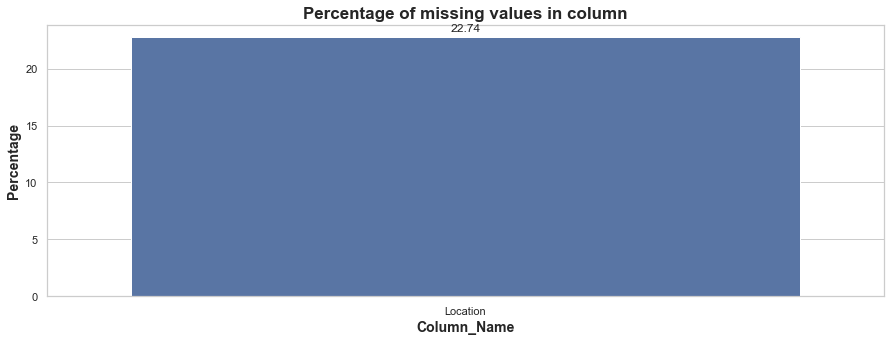

In [28]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

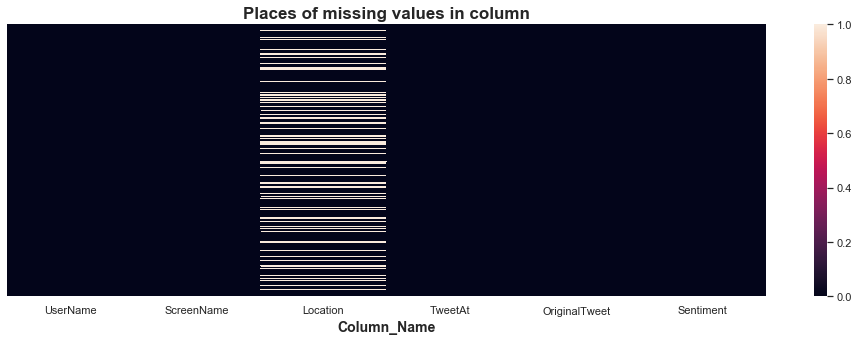

In [29]:
#heatmap for missing values
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

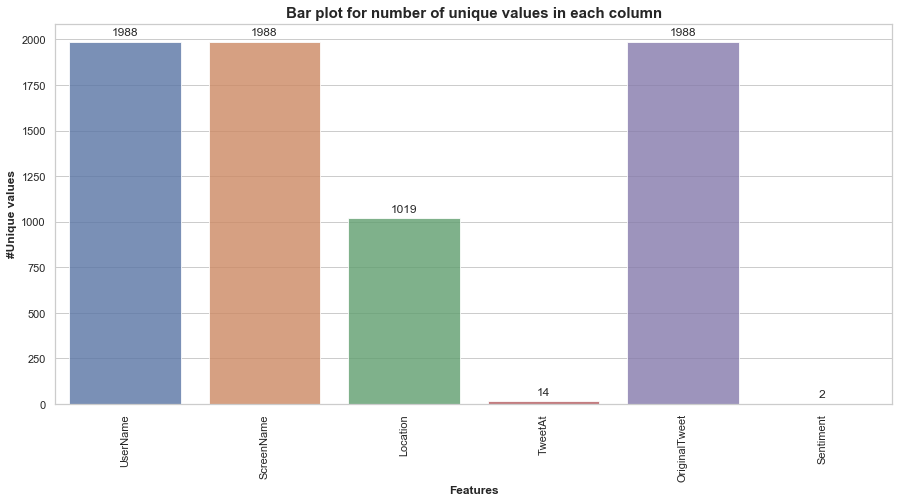

In [30]:
#unique values in each feature column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

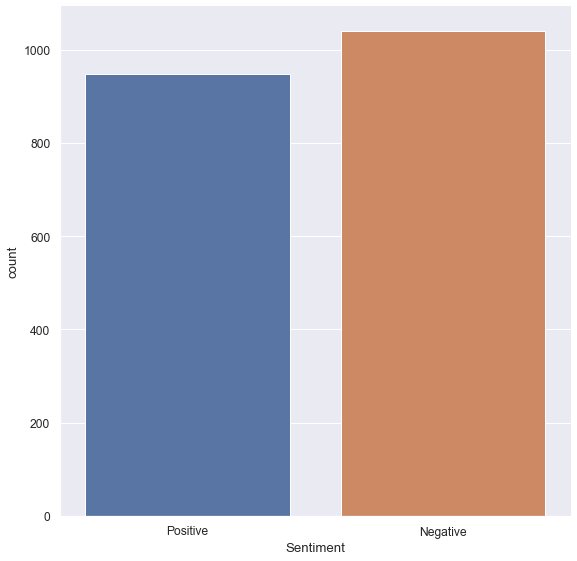

In [33]:
#sentiment countplot
sns.set(font_scale=1.1)
sns.catplot("Sentiment", data=df, kind="count", height=8)

In [38]:
#function to remove @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [39]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')

In [42]:
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY"
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...,Positive,Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...
4,5,44967,"Washington, DC",04-03-2020,"While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0",Positive,"While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0"
5,6,44971,NaN,05-03-2020,"That's about a week from now. A bit optimistic. Probably it will take another month. Supply chain may be recovering, demand chain will be non-existent in US and Europe for the next month or two....",Positive,"That's about a week from now. A bit optimistic. Probably it will take another month. Supply chain may be recovering, demand chain will be non-existent in US and Europe for the next month or two...."
6,7,44973,Malta,05-03-2020,"#CoronaVirus #COVID_19 People are starting to become frightened and to do #PanicShopping. Many shelves, meanwhile, turn empty as #goods are sold. #FaceMasks &amp; disinfection liquid are sold out,...",Negative,"#CoronaVirus #COVID_19 People are starting to become frightened and to do #PanicShopping. Many shelves, meanwhile, turn empty as #goods are sold. #FaceMasks &amp; disinfection liquid are sold out,..."
7,8,44978,"Wayne County, MI",07-03-2020,Alright yall I hope our Melanin prevails but just in case I took some precautions I had some food &amp; water delivered. ????? Ive had my masks for a month and may have to open soon! \r\r\n?? #B...,Positive,Alright yall I hope our Melanin prevails but just in case I took some precautions I had some food &amp; water delivered. ????? Ive had my masks for a month and may have to open soon! \r\r\n?? #B...
8,9,44979,"Bondi Beach, Sydney",07-03-2020,When your usual grocery shopping @woolworths turns into a toilet paper fight in the supermarket aisle. Yikes. #toiletpaperpanic for the #coronavirus has taken a whole new level. https://t.co/aKJ28...,Negative,When your usual grocery shopping turns into a toilet paper fight in the supermarket aisle. Yikes. #toiletpaperpanic for the #coronavirus has taken a whole new level. https://t.co/aKJ283I20C
9,10,44980,NaN,07-03-2020,Coronavirus panic spreads: Costco is pulling free samples over COVID-19 - USA TODAY\r\r\n\r\r\nCoronavirus panic spreads: Costco is pulling free sa

In [43]:
#removing http and urls from tweets
import re
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [44]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices."
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...


In [48]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

In [49]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,When I couldn t find hand sanitizer at Fred Meyer I turned to #Amazon But for a pack of Purell Check out how #coronavirus concerns are driving up prices
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative,#Panic buying hits #NewYork City as anxious shoppers stock up on food amp medical supplies after #healthcare worker in her s becomes #BigApple st confirmed #coronavirus patient OR a #Bloomberg sta...
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive,Voting in the age of #coronavirus hand sanitizer #SuperTuesday
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...,Positive,Best quality couches at unbelievably low prices available to order We are in Boksburg GP For more info WhatsApp #SuperTuesdsy #PowerTalk #Covid #SayEntrepreneur #DJSBU
4,5,44967,"Washington, DC",04-03-2020,"While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0",Positive,While we were busy watching election returns and bracing for a Covid outbreak Trump nominated a chemical industry lobbyist to head the Consumer Product Safety Commission


In [50]:
# remove short words
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [51]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,When couldn find hand sanitizer Fred Meyer turned #Amazon But for pack Purell Check out how #coronavirus concerns are driving prices
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative,#Panic buying hits #NewYork City anxious shoppers stock food amp medical supplies after #healthcare worker her becomes #BigApple confirmed #coronavirus patient #Bloomberg staged event
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive,Voting the age #coronavirus hand sanitizer #SuperTuesday
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...,Positive,Best quality couches unbelievably low prices available order are Boksburg For more info WhatsApp #SuperTuesdsy #PowerTalk #Covid #SayEntrepreneur #DJSBU
4,5,44967,"Washington, DC",04-03-2020,"While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0",Positive,While were busy watching election returns and bracing for Covid outbreak Trump nominated chemical industry lobbyist head the Consumer Product Safety Commission


In [52]:
# create new variable tokenized tweet 
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [54]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,When couldn find hand sanitizer Fred Meyer turned #Amazon But for pack Purell Check out how #coronavirus concerns are driving prices
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative,#Panic buying hits #NewYork City anxious shoppers stock food amp medical supplies after #healthcare worker her becomes #BigApple confirmed #coronavirus patient #Bloomberg staged event
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive,Voting the age #coronavirus hand sanitizer #SuperTuesday
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...,Positive,Best quality couches unbelievably low prices available order are Boksburg For more info WhatsApp #SuperTuesdsy #PowerTalk #Covid #SayEntrepreneur #DJSBU
4,5,44967,"Washington, DC",04-03-2020,"While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0",Positive,While were busy watching election returns and bracing for Covid outbreak Trump nominated chemical industry lobbyist head the Consumer Product Safety Commission


In [55]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [56]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,When couldn find hand sanitizer Fred Meyer turned #Amazon But for pack Purell Check out how #coronavirus concerns are driving prices
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative,#Panic buying hits #NewYork City anxious shoppers stock food amp medical supplies after #healthcare worker her becomes #BigApple confirmed #coronavirus patient #Bloomberg staged event
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive,Voting the age #coronavirus hand sanitizer #SuperTuesday
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...,Positive,Best quality couches unbelievably low prices available order are Boksburg For more info WhatsApp #SuperTuesdsy #PowerTalk #Covid #SayEntrepreneur #DJSBU
4,5,44967,"Washington, DC",04-03-2020,"While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0",Positive,While were busy watching election returns and bracing for Covid outbreak Trump nominated chemical industry lobbyist head the Consumer Product Safety Commission


In [57]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [58]:
df['Tweet']  = tokenized_tweet
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,when couldn find hand sanit fred meyer turn #amazon but for pack purel check out how #coronaviru concern are drive price
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative,#panic buy hit #newyork citi anxiou shopper stock food amp medic suppli after #healthcar worker her becom #bigappl confirm #coronaviru patient #bloomberg stage event
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive,vote the age #coronaviru hand sanit #supertuesday
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...,Positive,best qualiti couch unbeliev low price avail order are boksburg for more info whatsapp #supertuesdsi #powertalk #covid #sayentrepreneur #djsbu
4,5,44967,"Washington, DC",04-03-2020,"While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0",Positive,while were busi watch elect return and brace for covid outbreak trump nomin chemic industri lobbyist head the consum product safeti commiss


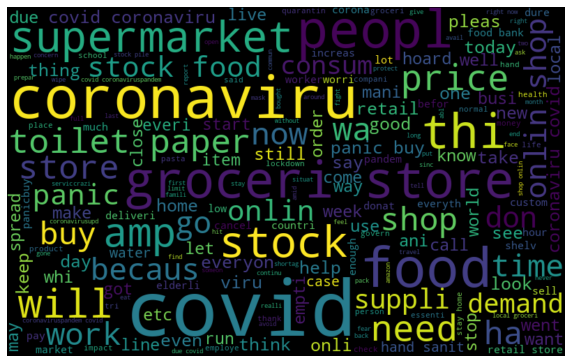

In [60]:
# create text from all tweets
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

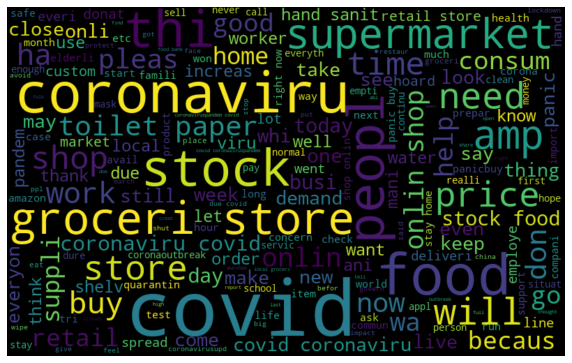

In [62]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

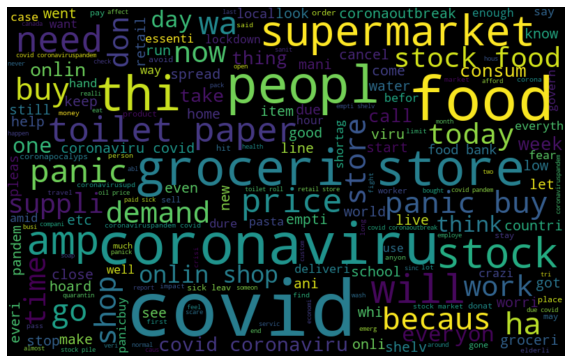

In [63]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [64]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [65]:
#extracting hasthtags from non racist/sexist tweets
HT_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Positive'])
HT_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Negative'])

#unnesting lists
HT_Positive = sum(HT_Positive, [])
HT_Negative = sum(HT_Negative, [])

In [66]:
print(HT_Positive)

['Amazon', 'coronavirus', 'coronavirus', 'SuperTuesday', 'SuperTuesdsy', 'PowerTalk', 'Covid_19', 'SayEntrepreneur', 'DJSBU', 'B1', 'FBA', 'CoronavirusUSA', 'COVID', 'Coronavirus', 'UI', 'Unemployment', 'PaidLeaveForAll', 'seniors', 'disabled', 'vets', 'Covid_19', 'coronavirus', 'Coronavirus', 'COVID2019', 'COVID2019', 'panicbuying', 'coronavirus', 'Coronavirus', 'COVID19', 'retail', 'ecommerce', 'study', 'coronavirus', 'COVID2019', 'Coronavirus', 'COVID2019', 'Manchester', 'iwilleatwithyou', 'Retail', 'store', 'coronavirus', 'coronavirus', 'COVID19', 'coronavirus', 'complexhealth', 'Americans', 'coronavirus', 'COVID19Canada', 'CoronavirusCanada', 'bcseniors', 'coronavirus', 'bigW', 'eastgardens', 'Coronavirus', 'stimulus', 'auspol', 'coronavirus', 'sxsw', 'coronavirus', 'Coronavirus', 'CancelEverything', 'tending', 'COVID19', 'coronavirus', 'coronavirus', 'coronavirus', 'foodsecurity', '4', 'Apple', 'Coronavirus', 'LouisVuitton', 'coronavirus', 'quarantine', 'pandemic', 'Forex', 'fore

In [67]:
print(HT_Negative)

['Panic', 'NewYork', 'healthcare', 'BigApple', 'coronavirus', 'Bloomberg', 'QAnon', 'QAnon2018', 'QAnon2020', 'Election2020', 'CDC', 'CoronaVirus', 'COVID_19', 'PanicShopping', 'goods', 'FaceMasks', 'Blockchain', 'CryptoNews', 'toiletpaperpanic', 'coronavirus', 'covid19', 'coronavirus', 'coronavirus', 'COVID19', 'coronavirus', 'vaccinations', 'Coronavirus', 'ToiletPaper', 'CoronaVirus', 'coronavirus', 'coronavirus', 'Coronavirus', 'doomsdayBunker', 'coronavirus', 'COVID19', 'Trumpdemic', 'coronavirus', 'DonaldTrump', 'COVID19', 'Trumpdemic', 'coronaviru', 'earnings', 'coronavirus', 'TrustedData', 'Refinitiv', 'COVID19', 'COVID2019', 'remoteworking', 'broadband', 'rural', 'coronavirus', 'payrolltax', 'coronavirus', 'Covid_19', 'Coronavirus', 'ShippingContainers', 'MrBox', 'hamsterkäufe', 'COVID2019', 'covid19ireland', 'Coronavirusireland', 'panicbuyingireland', 'panicbuying', 'coronavirus', 'Coronavirus', 'trusselltrust', 'coronavirus', 'foodbanks', 'poverty', 'uk', 'COVID2019', 'corona

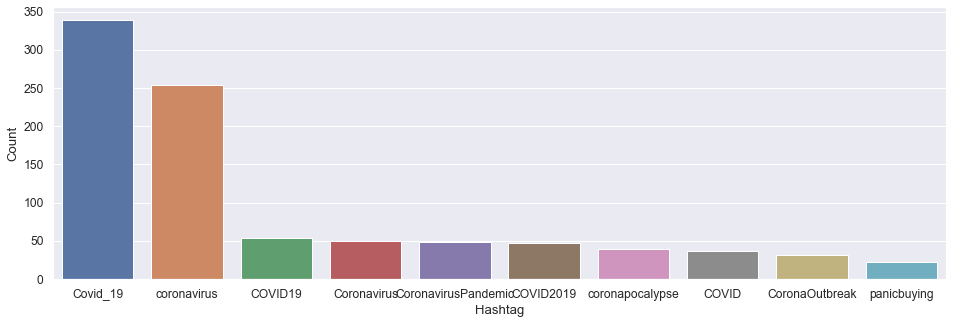

In [69]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

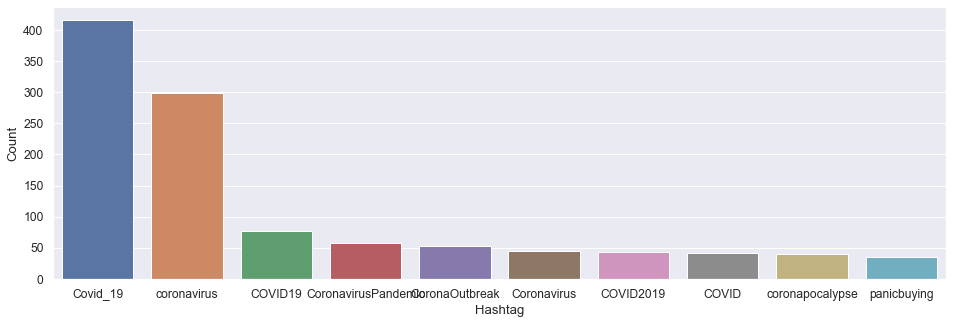

In [70]:
# making frequency distribution top 10 Negative hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [71]:
new_df = df[['Tweet','Sentiment']]

In [72]:
new_df.head()

,Tweet,Sentiment
0,when couldn find hand sanit fred meyer turn #amazon but for pack purel check out how #coronaviru concern are drive price,Positive
1,#panic buy hit #newyork citi anxiou shopper stock food amp medic suppli after #healthcar worker her becom #bigappl confirm #coronaviru patient #bloomberg stage event,Negative
2,vote the age #coronaviru hand sanit #supertuesday,Positive
3,best qualiti couch unbeliev low price avail order are boksburg for more info whatsapp #supertuesdsi #powertalk #covid #sayentrepreneur #djsbu,Positive
4,while were busi watch elect return and brace for covid outbreak trump nomin chemic industri lobbyist head the consum product safeti commiss,Positive


In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJENDRAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [74]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [75]:
new_df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0       [w, h, e, n,  , c, u, l, n,  , f, n,  , h, n,  , n,  , f, r, e,  , e, e, r,  , u, r, n,  , #, z, n,  , b, u,  , f, r,  , p, c, k,  , p, u, r, e, l,  , c, h, e, c, k,  , u,  , h, w,  , #, c, r, n, ...
1       [#, p, n, c,  , b, u,  , h,  , #, n, e, w, r, k,  , c,  , n, x, u,  , h, p, p, e, r,  , c, k,  , f,  , p,  , e, c,  , u, p, p, l,  , f, e, r,  , #, h, e, l, h, c, r,  , w, r, k, e, r,  , h, e, r, ...
2                                                                                                                       [v, e,  , h, e,  , g, e,  , #, c, r, n, v, r, u,  , h, n,  , n,  , #, u, p, e, r, u, e]
3       [b, e,  , q, u, l,  , c, u, c, h,  , u, n, b, e, l, e, v,  , l, w,  , p, r, c, e,  , v, l,  , r, e, r,  , r, e,  , b, k, b, u, r, g,  , f, r,  , r, e,  , n, f,  , w, h, p, p,  , #, u, p, e, r, u, ...
4       [w, h, l, e,  , w, e, r, e,  , b, u,  , w, c, h,  , e, l, e, c,  , r, e, u, r, n,  , n,  , b, r, c, e,  , f, r,  , c, v,  , u, b, r, e, k,  , r, u, p,  , n, n, 

In [76]:
new_df.head()

,Tweet,Sentiment
0,when couldn find hand sanit fred meyer turn #amazon but for pack purel check out how #coronaviru concern are drive price,Positive
1,#panic buy hit #newyork citi anxiou shopper stock food amp medic suppli after #healthcar worker her becom #bigappl confirm #coronaviru patient #bloomberg stage event,Negative
2,vote the age #coronaviru hand sanit #supertuesday,Positive
3,best qualiti couch unbeliev low price avail order are boksburg for more info whatsapp #supertuesdsi #powertalk #covid #sayentrepreneur #djsbu,Positive
4,while were busi watch elect return and brace for covid outbreak trump nomin chemic industri lobbyist head the consum product safeti commiss,Positive


In [77]:
new_df.shape

(1988, 2)

In [78]:
new_df.isna().sum()

Tweet        0
Sentiment    0
dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (1590, 2)
valid shape :  (398, 2)


# Binary classification

In [90]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (1590, 4654)
X_train.shape :  (398, 4654)
y_train.shape :  (1590,)
y_valid.shape :  (398,)


In [91]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.950314465408805
Validation accuracy Score :  0.5778894472361809
              precision    recall  f1-score   support

    Negative       0.64      0.59      0.61       226
    Positive       0.51      0.56      0.54       172

    accuracy                           0.58       398
   macro avg       0.57      0.58      0.57       398
weighted avg       0.58      0.58      0.58       398



In [92]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.6105527638190955
              precision    recall  f1-score   support

    Negative       0.72      0.61      0.66       245
    Positive       0.49      0.61      0.55       153

    accuracy                           0.61       398
   macro avg       0.61      0.61      0.60       398
weighted avg       0.63      0.61      0.62       398



In [93]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.989937106918239
Validation accuracy Score :  0.6130653266331658
              precision    recall  f1-score   support

    Negative       0.64      0.63      0.64       214
    Positive       0.58      0.60      0.59       184

    accuracy                           0.61       398
   macro avg       0.61      0.61      0.61       398
weighted avg       0.61      0.61      0.61       398



In [94]:
#xgboost
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

[15:39:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.9314465408805032
Validation accuracy Score :  0.6457286432160804
              precision    recall  f1-score   support

    Negative       0.69      0.65      0.67       219
    Positive       0.60      0.64      0.62       179

    accuracy                           0.65       398
   macro avg       0.64      0.64      0.64       398
weighted avg       0.65      0.65      0.65       398



In [95]:
#support vector machine
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9773584905660377
Validation accuracy Score :  0.6055276381909548
              precision    recall  f1-score   support

    Negative       0.68      0.61      0.64       231
    Positive       0.53      0.60      0.56       167

    accuracy                           0.61       398
   macro avg       0.60      0.60      0.60       398
weighted avg       0.61      0.61      0.61       398



In [96]:
#stochastic gradient decent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9962264150943396
Validation accuracy Score :  0.6381909547738693
              precision    recall  f1-score   support

    Negative       0.61      0.67      0.64       188
    Positive       0.67      0.61      0.64       210

    accuracy                           0.64       398
   macro avg       0.64      0.64      0.64       398
weighted avg       0.64      0.64      0.64       398



In [97]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
5,XGBoost,0.645729
4,Stochastic Gradient Decent,0.638191
1,Logistic Regression,0.613065
2,Random Forest,0.610553
0,Support Vector Machines,0.605528
3,Naive Bayes,0.577889


# Multiclass classification

In [80]:
#counter vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (1590, 4654)
X_train.shape :  (398, 4654)
y_train.shape :  (1590,)
y_valid.shape :  (398,)


In [81]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.950314465408805
Validation accuracy Score :  0.5778894472361809
              precision    recall  f1-score   support

    Negative       0.64      0.59      0.61       226
    Positive       0.51      0.56      0.54       172

    accuracy                           0.58       398
   macro avg       0.57      0.58      0.57       398
weighted avg       0.58      0.58      0.58       398



In [82]:
#stochaistic gradient decent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9962264150943396
Validation accuracy Score :  0.6381909547738693
              precision    recall  f1-score   support

    Negative       0.61      0.67      0.64       188
    Positive       0.67      0.61      0.64       210

    accuracy                           0.64       398
   macro avg       0.64      0.64      0.64       398
weighted avg       0.64      0.64      0.64       398



In [83]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.6180904522613065
              precision    recall  f1-score   support

    Negative       0.73      0.61      0.67       248
    Positive       0.49      0.63      0.55       150

    accuracy                           0.62       398
   macro avg       0.61      0.62      0.61       398
weighted avg       0.64      0.62      0.62       398



In [84]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.989937106918239
Validation accuracy Score :  0.6130653266331658
              precision    recall  f1-score   support

    Negative       0.64      0.63      0.64       214
    Positive       0.58      0.60      0.59       184

    accuracy                           0.61       398
   macro avg       0.61      0.61      0.61       398
weighted avg       0.61      0.61      0.61       398



In [86]:
#support vector machine
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9773584905660377
Validation accuracy Score :  0.6055276381909548
              precision    recall  f1-score   support

    Negative       0.68      0.61      0.64       231
    Positive       0.53      0.60      0.56       167

    accuracy                           0.61       398
   macro avg       0.60      0.60      0.60       398
weighted avg       0.61      0.61      0.61       398



In [87]:
#xgboost
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

[15:32:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.9314465408805032
Validation accuracy Score :  0.6457286432160804
              precision    recall  f1-score   support

    Negative       0.69      0.65      0.67       219
    Positive       0.60      0.64      0.62       179

    accuracy                           0.65       398
   macro avg       0.64      0.64      0.64       398
weighted avg       0.65      0.65      0.65       398



In [88]:
#test accuracy in descending order
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
5,XGBoost,0.645729
4,Stochastic Gradient Decent,0.638191
2,Random Forest,0.618090
1,Logistic Regression,0.613065
0,Support Vector Machines,0.605528
3,Naive Bayes,0.577889
